In [173]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "log_evaluations.xlsx"  # Replace with your actual file path
df = pd.read_excel("log_evaluations.xlsx")

In [174]:
df.head(5)
# filter models with les than 100 "Number of Samples"
df = df[df["Number of Samples"] > 100]

In [175]:
# sort the data by model name
df = df.sort_values(by='Model')

In [176]:
# Function to insert line breaks in model names and make all letters lowercase
def process_model_names(text, max_length=20):
    text = text.lower()
    return '\n'.join([text[i:i+max_length] for i in range(0, len(text), max_length)])

# Apply the transformations to the 'Model' column
df['Model'] = df['Model'].apply(process_model_names)

# Sort the DataFrame by the modified 'Model' column
df = df.sort_values(by='Model')

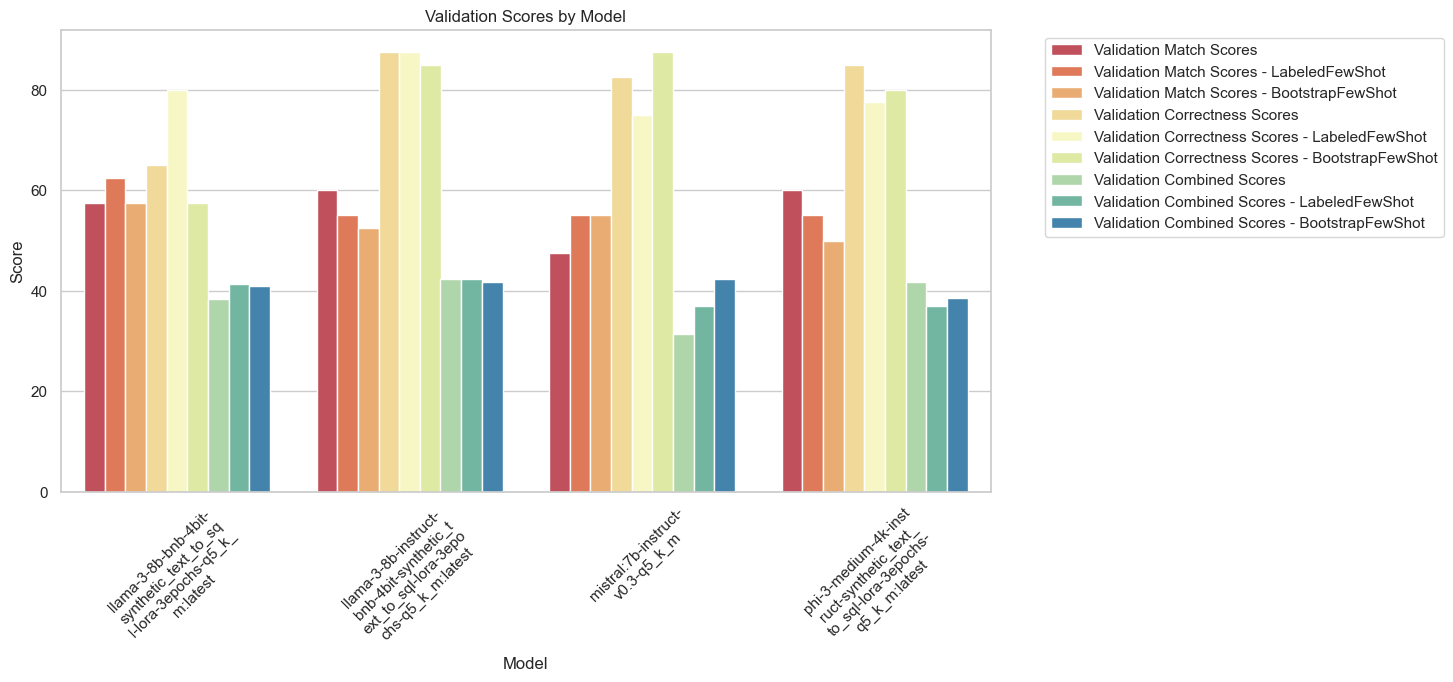

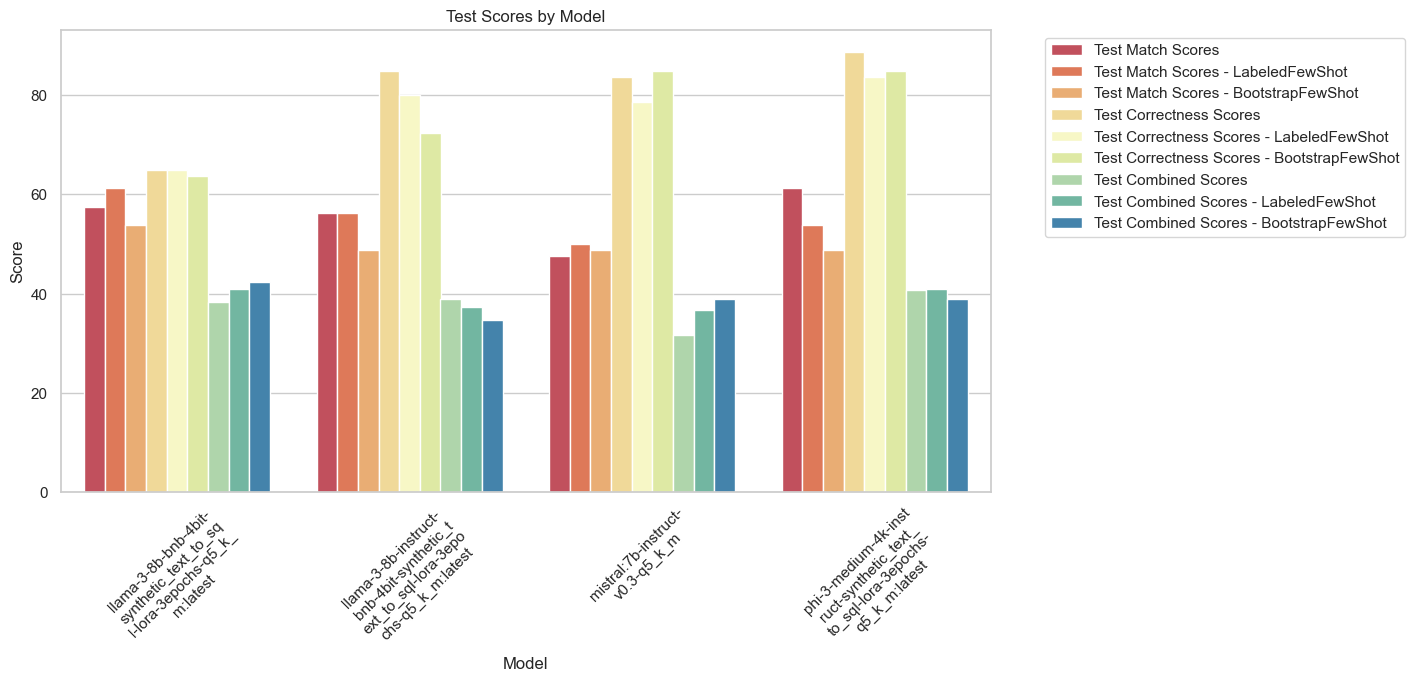

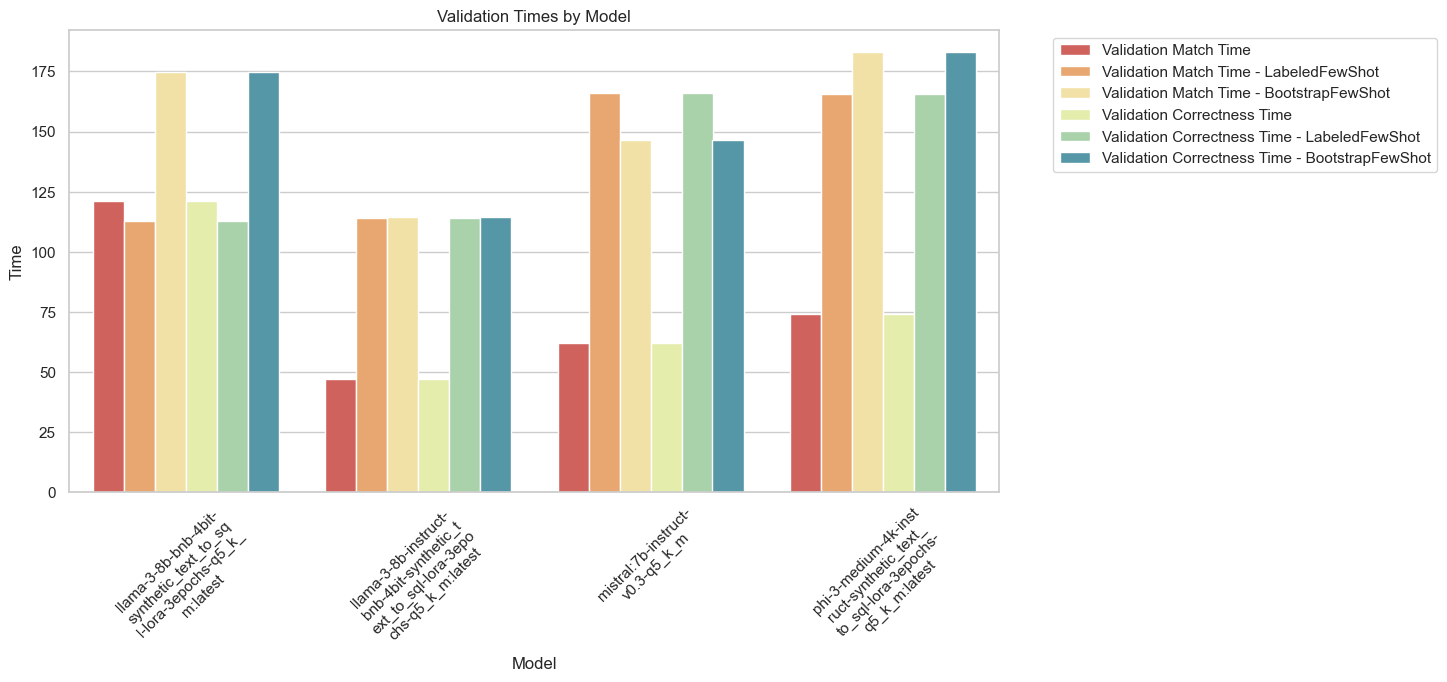

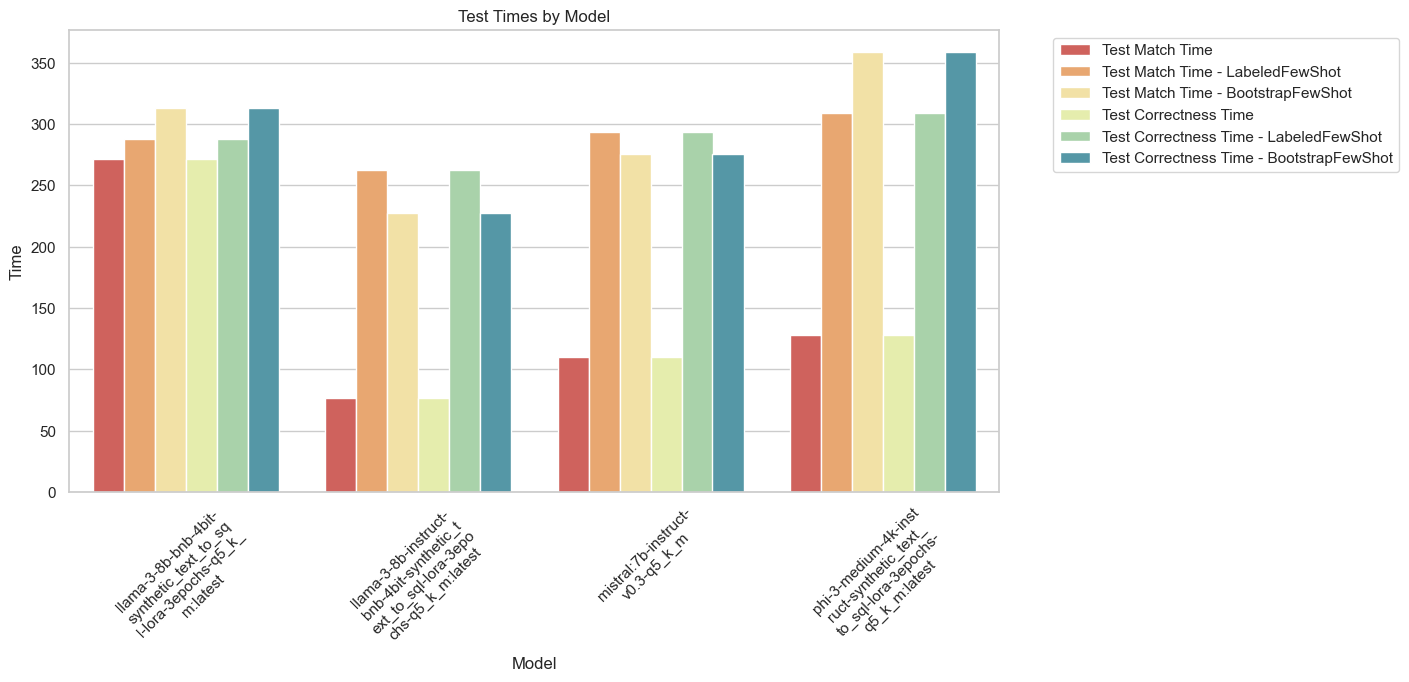

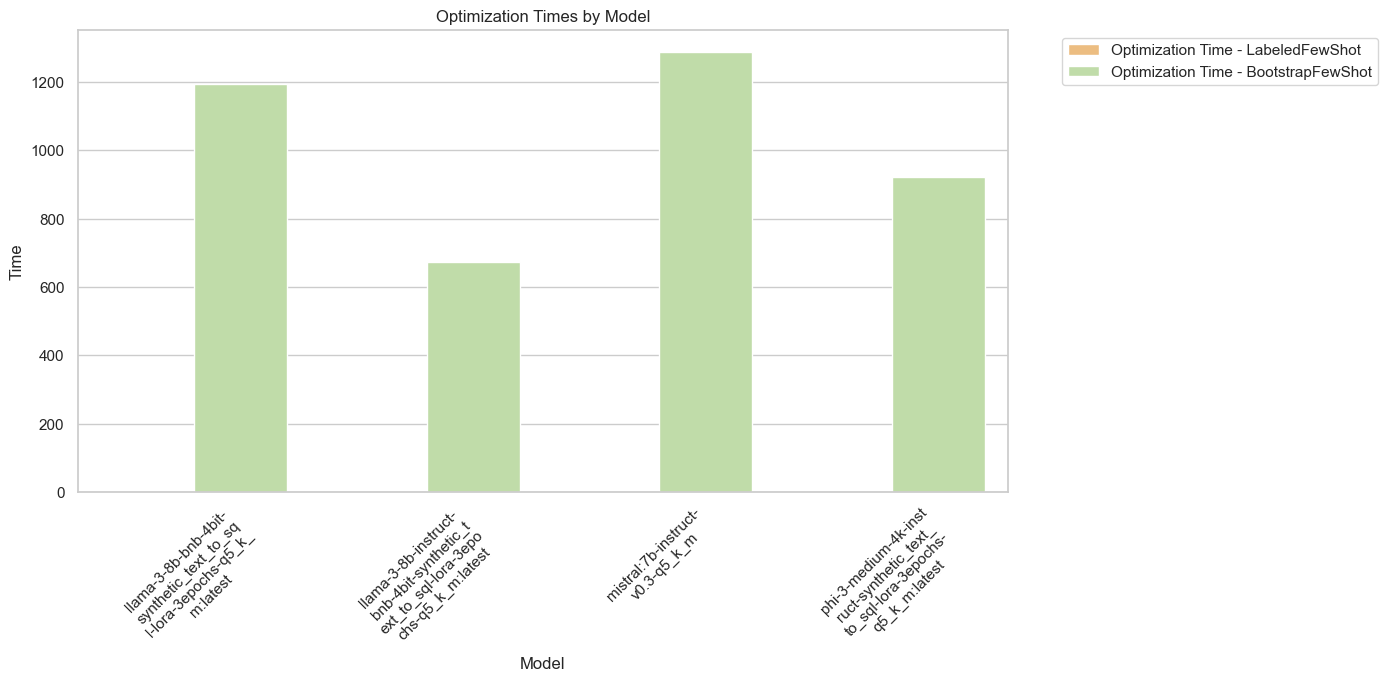

In [177]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create grouped bar plot for scores
def plot_grouped_scores(df, score_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='Spectral')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Function to create grouped bar plot for times
def plot_grouped_times(df, time_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='Spectral')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot grouped validation scores
plot_grouped_scores(df, [
    "Validation Match Scores", "Validation Match Scores - LabeledFewShot", "Validation Match Scores - BootstrapFewShot",
    "Validation Correctness Scores", "Validation Correctness Scores - LabeledFewShot", "Validation Correctness Scores - BootstrapFewShot",
    "Validation Combined Scores", "Validation Combined Scores - LabeledFewShot", "Validation Combined Scores - BootstrapFewShot"
], 'Validation Scores by Model')

# Plot grouped test scores
plot_grouped_scores(df, [
    "Test Match Scores", "Test Match Scores - LabeledFewShot", "Test Match Scores - BootstrapFewShot",
    "Test Correctness Scores", "Test Correctness Scores - LabeledFewShot", "Test Correctness Scores - BootstrapFewShot",
    "Test Combined Scores", "Test Combined Scores - LabeledFewShot", "Test Combined Scores - BootstrapFewShot"
], 'Test Scores by Model')

# Plot grouped validation times
plot_grouped_times(df, [
    "Validation Match Time", "Validation Match Time - LabeledFewShot", "Validation Match Time - BootstrapFewShot",
    "Validation Correctness Time", "Validation Correctness Time - LabeledFewShot", "Validation Correctness Time - BootstrapFewShot"
], 'Validation Times by Model')

# Plot grouped test times
plot_grouped_times(df, [
    "Test Match Time", "Test Match Time - LabeledFewShot", "Test Match Time - BootstrapFewShot",
    "Test Correctness Time", "Test Correctness Time - LabeledFewShot", "Test Correctness Time - BootstrapFewShot"
], 'Test Times by Model')

# Plot grouped optimization times
plot_grouped_times(df, [
    "Optimization Time - LabeledFewShot", "Optimization Time - BootstrapFewShot"
], 'Optimization Times by Model')

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\1657091205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')


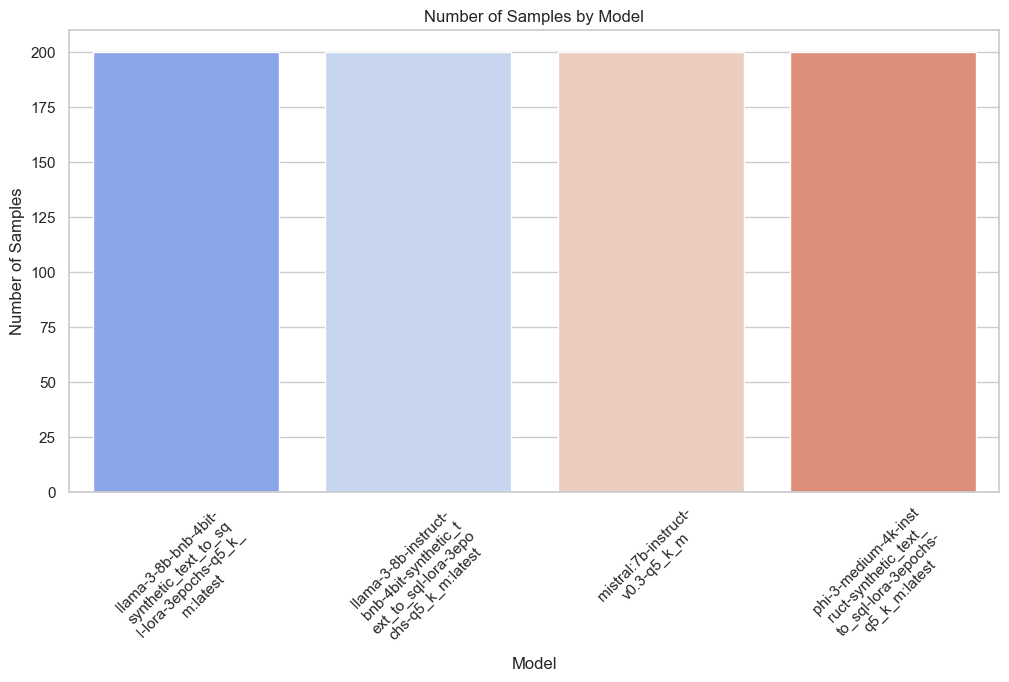

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\1657091205.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Random Seed', data=df, palette='tab10')


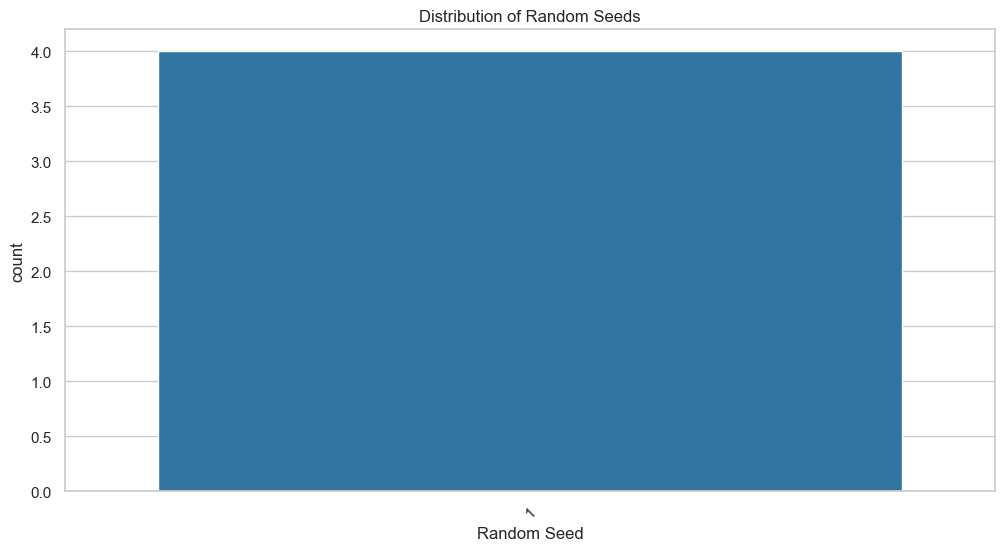

In [178]:
# Additional functions for further analysis

# Function to plot number of samples by model
def plot_samples(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')
    plt.title('Number of Samples by Model')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot random seed distribution
def plot_random_seed(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Random Seed', data=df, palette='tab10')
    plt.title('Distribution of Random Seeds')
    plt.xticks(rotation=45)
    plt.show()

# Plot number of samples and random seed distribution
plot_samples(df)
plot_random_seed(df)

# # Function to plot comparison of candidate programs in FewShot methods
# def plot_candidate_programs(df):
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
#     sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')
#     plt.title('Number of Candidate Programs by Model')
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.show()

# # Plot candidate programs comparison
# plot_candidate_programs(df)

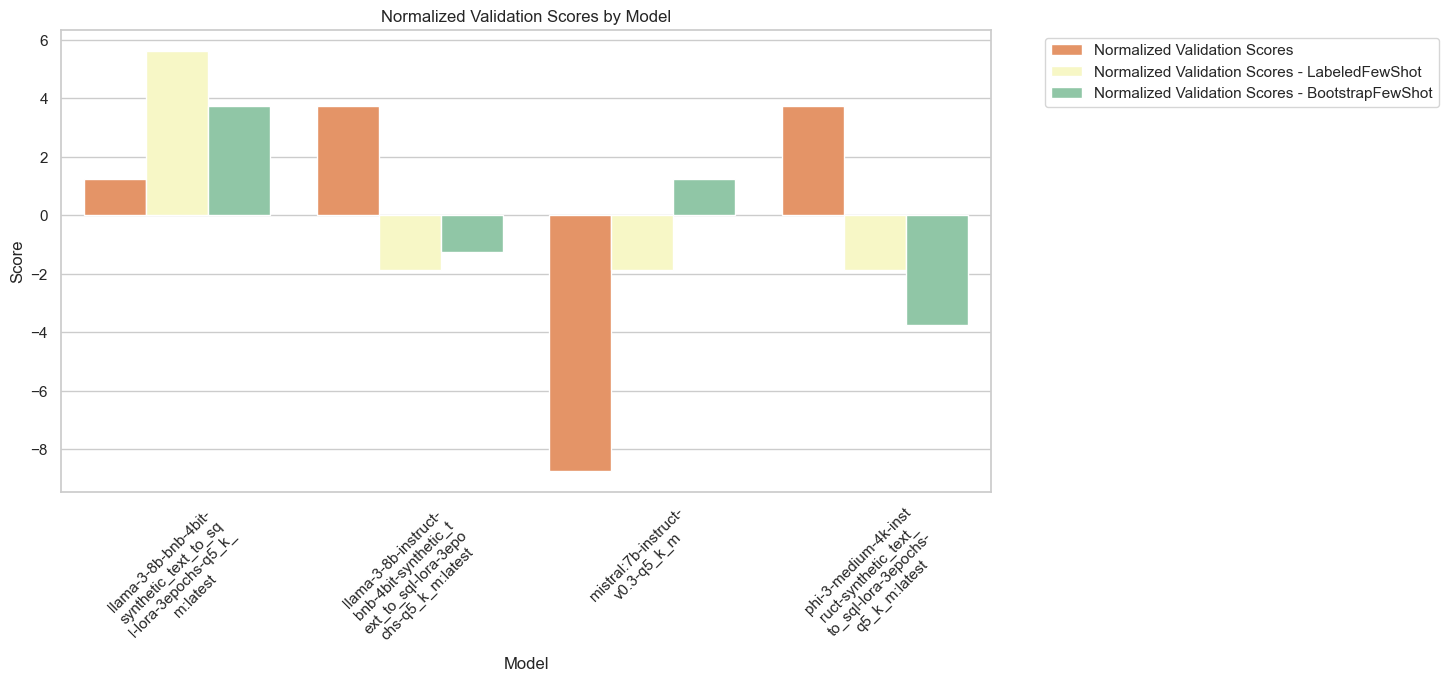

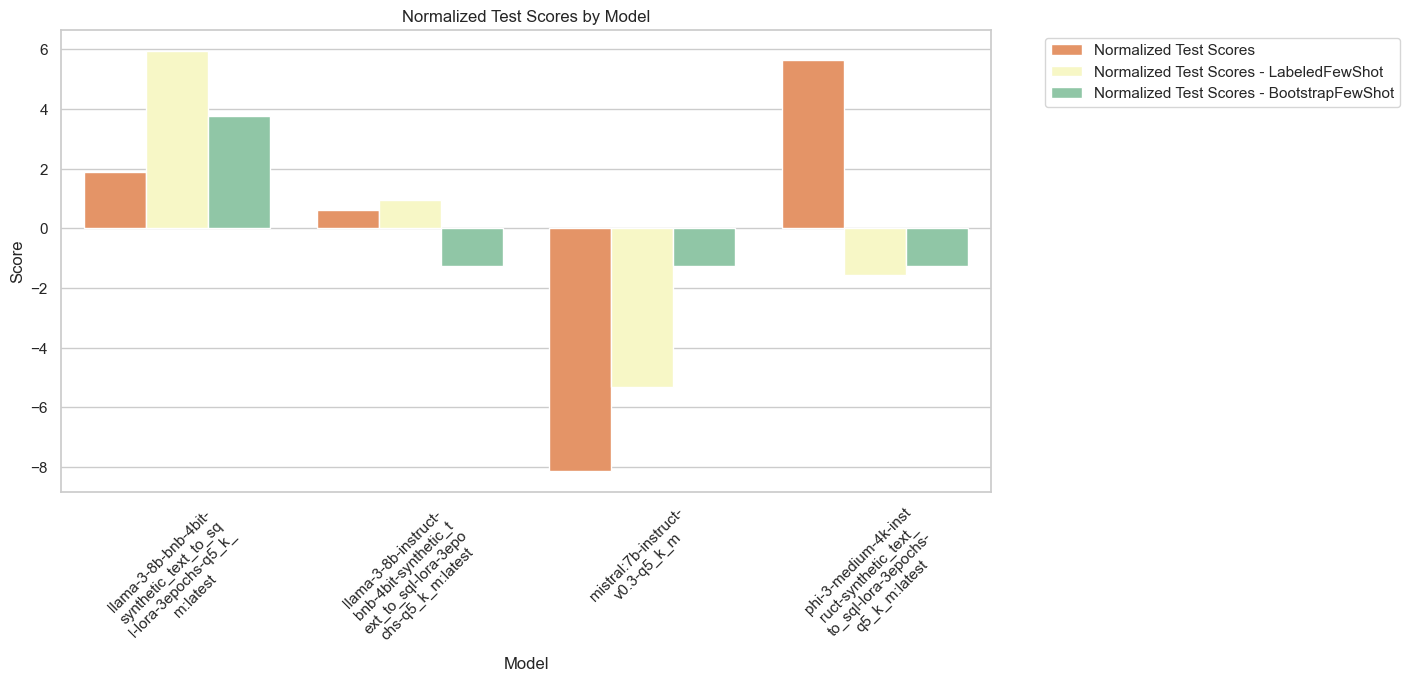

In [179]:
# Ensure the correct column names are used
validation_score_columns = ["Validation Match Scores", "Validation Match Scores - LabeledFewShot", "Validation Match Scores - BootstrapFewShot"]
test_score_columns = ["Test Match Scores", "Test Match Scores - LabeledFewShot", "Test Match Scores - BootstrapFewShot"]

# Calculate the mean performance for each score type
mean_validation_scores = df[validation_score_columns].mean(axis=0)
mean_test_scores = df[test_score_columns].mean(axis=0)

# Normalize the scores by subtracting the mean score
df['Normalized Validation Scores'] = df['Validation Match Scores'] - mean_validation_scores['Validation Match Scores']
df['Normalized Validation Scores - LabeledFewShot'] = df['Validation Match Scores - LabeledFewShot'] - mean_validation_scores['Validation Match Scores - LabeledFewShot']
df['Normalized Validation Scores - BootstrapFewShot'] = df['Validation Match Scores - BootstrapFewShot'] - mean_validation_scores['Validation Match Scores - BootstrapFewShot']

df['Normalized Test Scores'] = df['Test Match Scores'] - mean_test_scores['Test Match Scores']
df['Normalized Test Scores - LabeledFewShot'] = df['Test Match Scores - LabeledFewShot'] - mean_test_scores['Test Match Scores - LabeledFewShot']
df['Normalized Test Scores - BootstrapFewShot'] = df['Test Match Scores - BootstrapFewShot'] - mean_test_scores['Test Match Scores - BootstrapFewShot']

# Plot grouped normalized validation scores
plot_grouped_scores(df, ['Normalized Validation Scores', 'Normalized Validation Scores - LabeledFewShot', 'Normalized Validation Scores - BootstrapFewShot'], 'Normalized Validation Scores by Model')

# Plot grouped normalized test scores
plot_grouped_scores(df, ['Normalized Test Scores', 'Normalized Test Scores - LabeledFewShot', 'Normalized Test Scores - BootstrapFewShot'], 'Normalized Test Scores by Model')

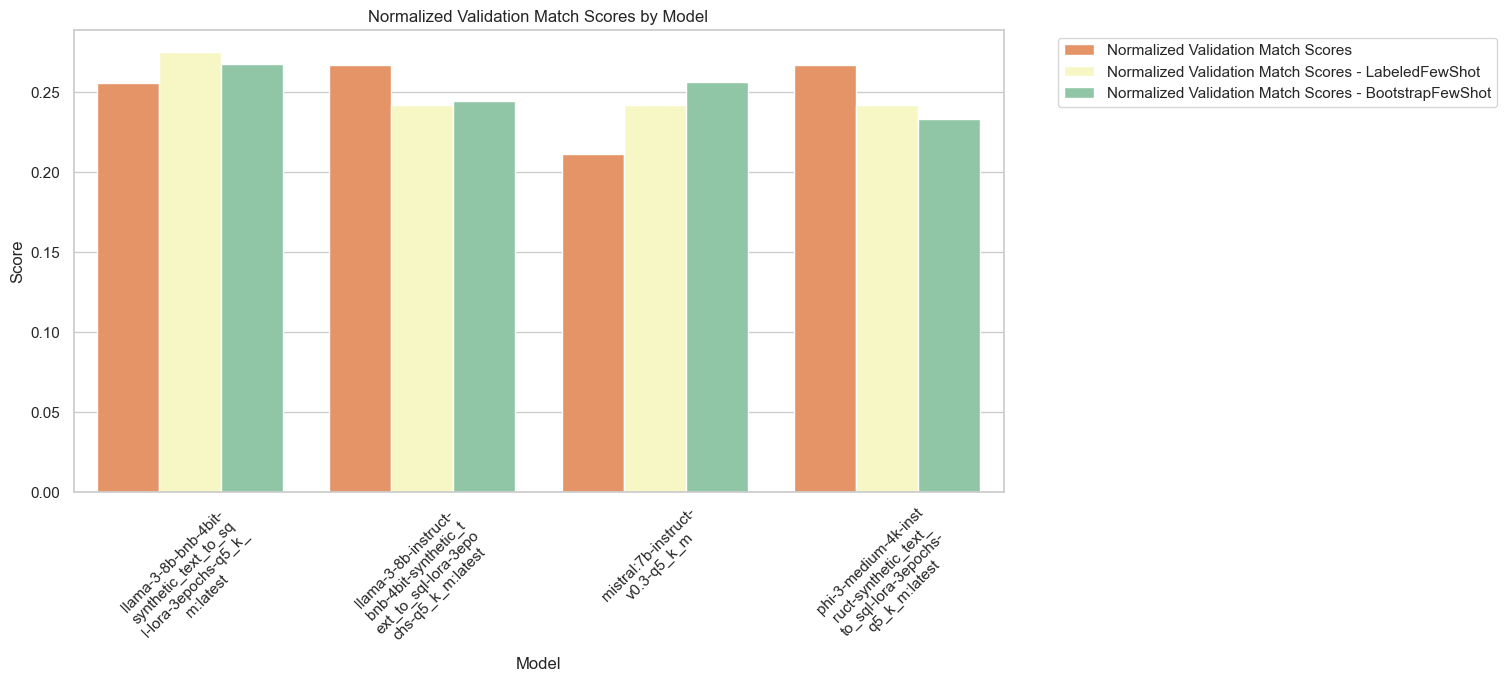

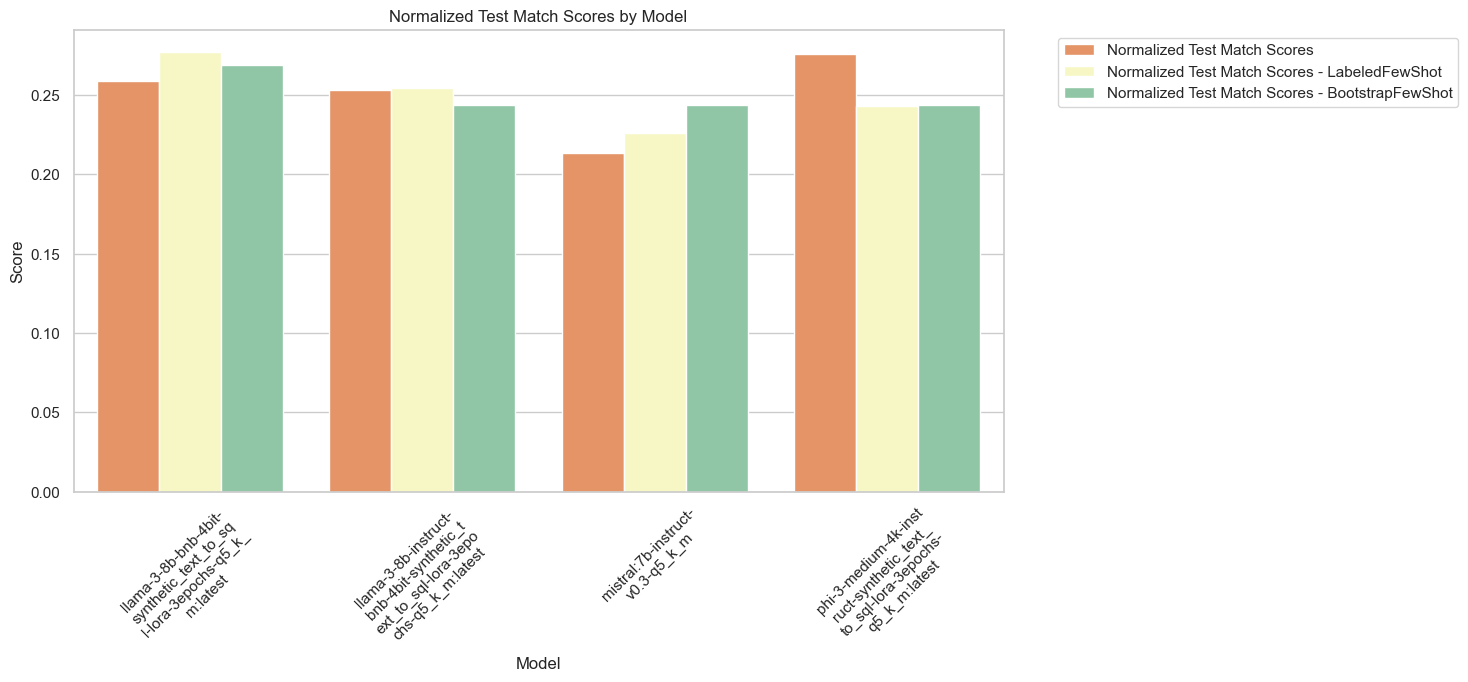

In [180]:
# Calculate the sum of each score type
sum_validation_scores = df[['Validation Match Scores', 'Validation Match Scores - LabeledFewShot', 'Validation Match Scores - BootstrapFewShot']].sum(axis=0)
sum_test_scores = df[['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Normalized Validation Match Scores'] = df['Validation Match Scores'] / sum_validation_scores['Validation Match Scores']
df['Normalized Validation Match Scores - LabeledFewShot'] = df['Validation Match Scores - LabeledFewShot'] / sum_validation_scores['Validation Match Scores - LabeledFewShot']
df['Normalized Validation Match Scores - BootstrapFewShot'] = df['Validation Match Scores - BootstrapFewShot'] / sum_validation_scores['Validation Match Scores - BootstrapFewShot']

df['Normalized Test Match Scores'] = df['Test Match Scores'] / sum_test_scores['Test Match Scores']
df['Normalized Test Match Scores - LabeledFewShot'] = df['Test Match Scores - LabeledFewShot'] / sum_test_scores['Test Match Scores - LabeledFewShot']
df['Normalized Test Match Scores - BootstrapFewShot'] = df['Test Match Scores - BootstrapFewShot'] / sum_test_scores['Test Match Scores - BootstrapFewShot']

# Plot grouped normalized validation scores
plot_grouped_scores(df, [
    'Normalized Validation Match Scores', 
    'Normalized Validation Match Scores - LabeledFewShot', 
    'Normalized Validation Match Scores - BootstrapFewShot'], 
    'Normalized Validation Match Scores by Model')

# Plot grouped normalized test scores
plot_grouped_scores(df, [
    'Normalized Test Match Scores', 
    'Normalized Test Match Scores - LabeledFewShot', 
    'Normalized Test Match Scores - BootstrapFewShot'], 
    'Normalized Test Match Scores by Model')

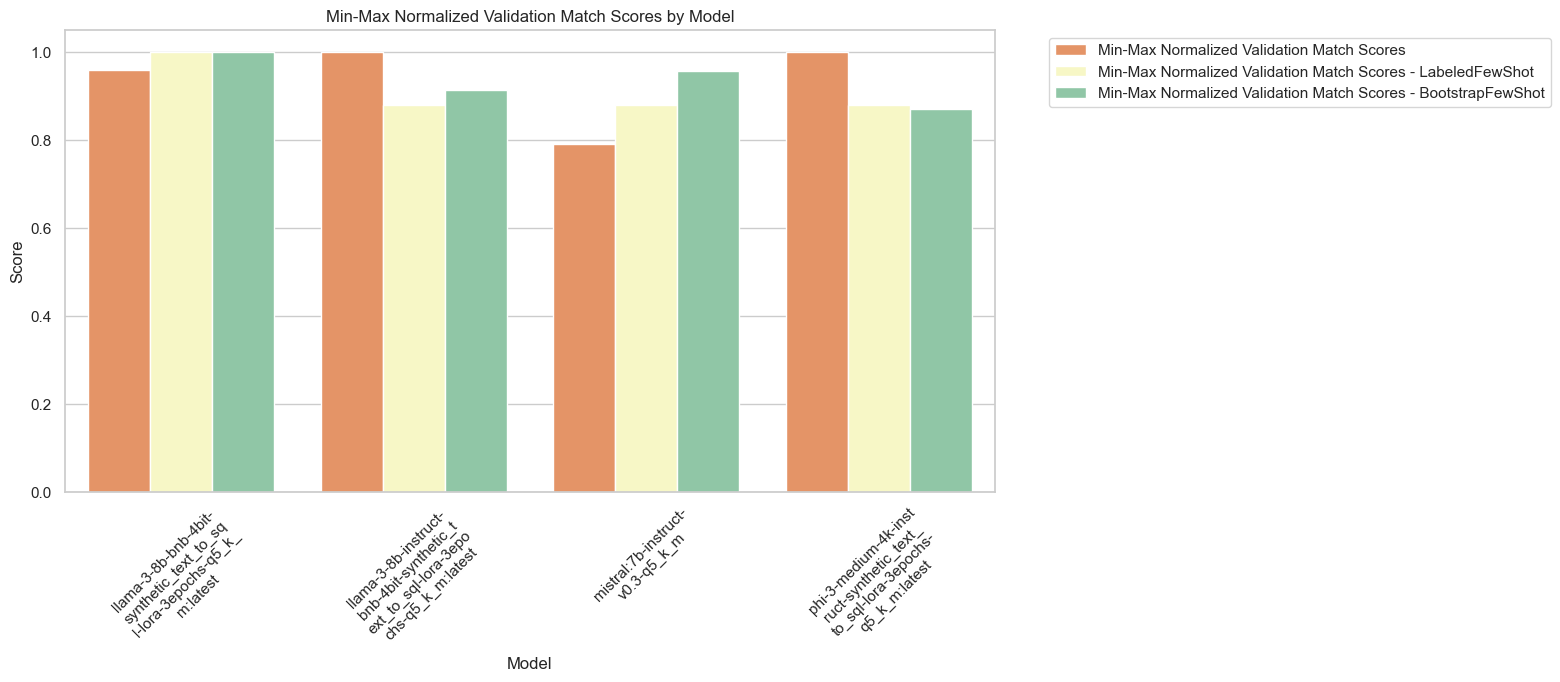

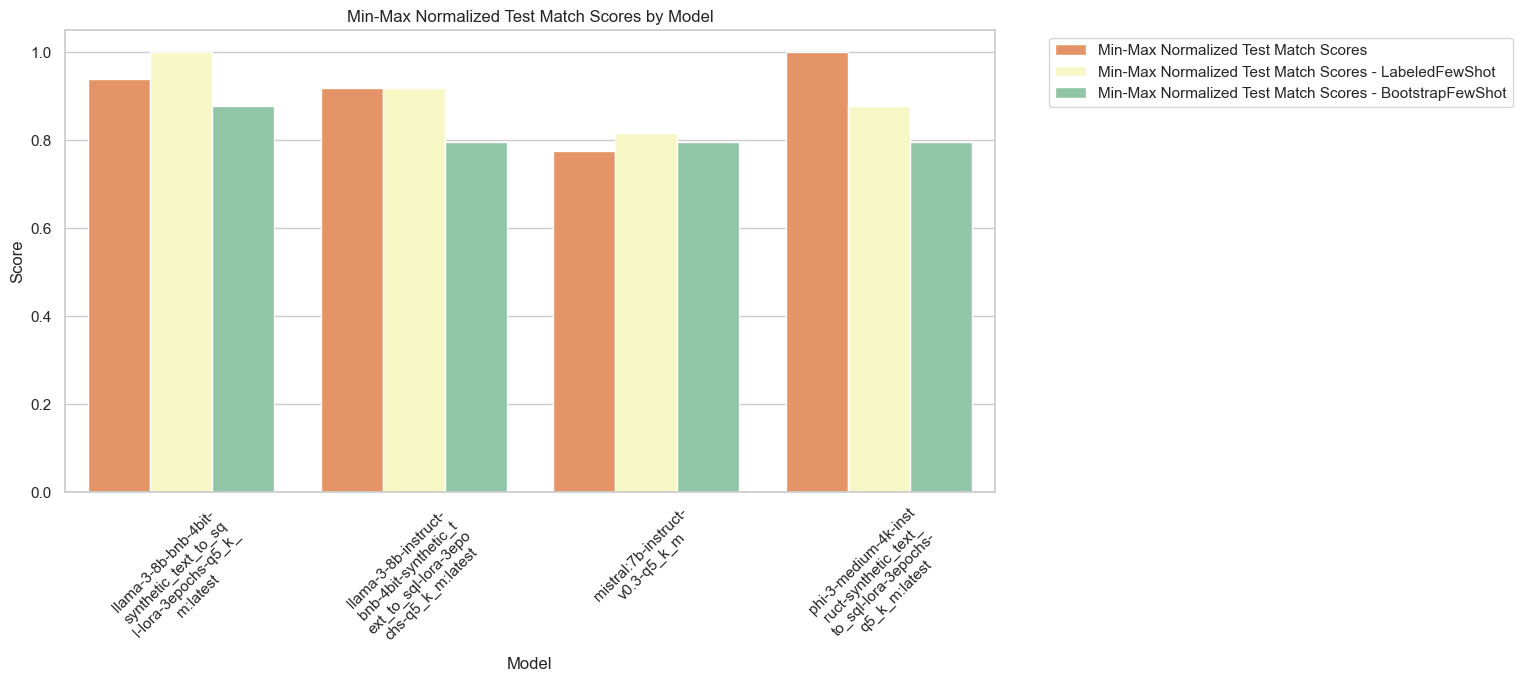

In [181]:
# Calculate the maximum value for each score type
max_validation_scores = df[['Validation Match Scores', 'Validation Match Scores - LabeledFewShot', 'Validation Match Scores - BootstrapFewShot']].max(axis=0)
max_test_scores = df[['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot']].max(axis=0)

# Normalize the scores by dividing by the maximum value
df['Min-Max Normalized Validation Match Scores'] = df['Validation Match Scores'] / max_validation_scores['Validation Match Scores']
df['Min-Max Normalized Validation Match Scores - LabeledFewShot'] = df['Validation Match Scores - LabeledFewShot'] / max_validation_scores['Validation Match Scores - LabeledFewShot']
df['Min-Max Normalized Validation Match Scores - BootstrapFewShot'] = df['Validation Match Scores - BootstrapFewShot'] / max_validation_scores['Validation Match Scores - BootstrapFewShot']

df['Min-Max Normalized Test Match Scores'] = df['Test Match Scores'] / max_test_scores['Test Match Scores']
df['Min-Max Normalized Test Match Scores - LabeledFewShot'] = df['Test Match Scores - LabeledFewShot'] / max_test_scores['Test Match Scores - LabeledFewShot']
df['Min-Max Normalized Test Match Scores - BootstrapFewShot'] = df['Test Match Scores - BootstrapFewShot'] / max_test_scores['Test Match Scores']

# Plot min-max normalized validation scores
plot_grouped_scores(df, ['Min-Max Normalized Validation Match Scores', 'Min-Max Normalized Validation Match Scores - LabeledFewShot', 'Min-Max Normalized Validation Match Scores - BootstrapFewShot'], 'Min-Max Normalized Validation Match Scores by Model')

# Plot min-max normalized test scores
plot_grouped_scores(df, ['Min-Max Normalized Test Match Scores', 'Min-Max Normalized Test Match Scores - LabeledFewShot', 'Min-Max Normalized Test Match Scores - BootstrapFewShot'], 'Min-Max Normalized Test Match Scores by Model')


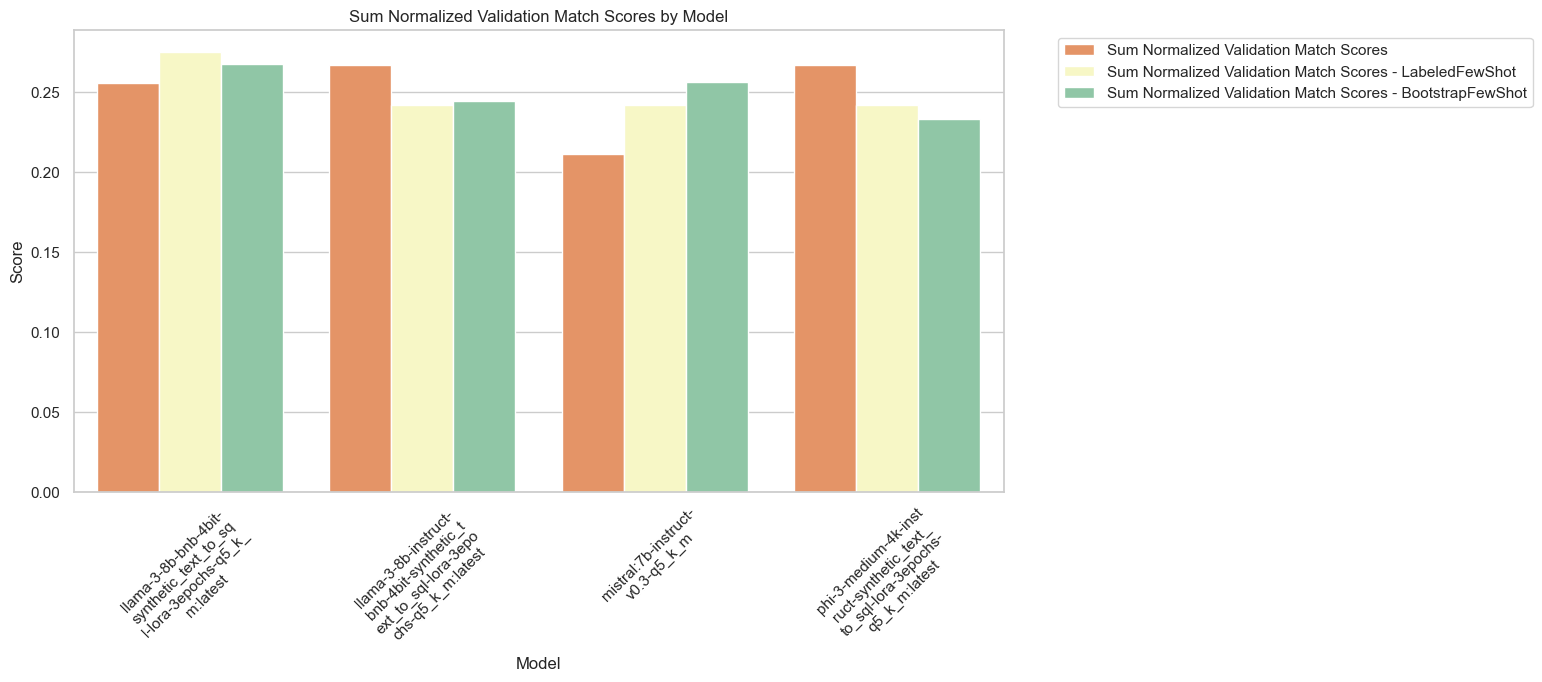

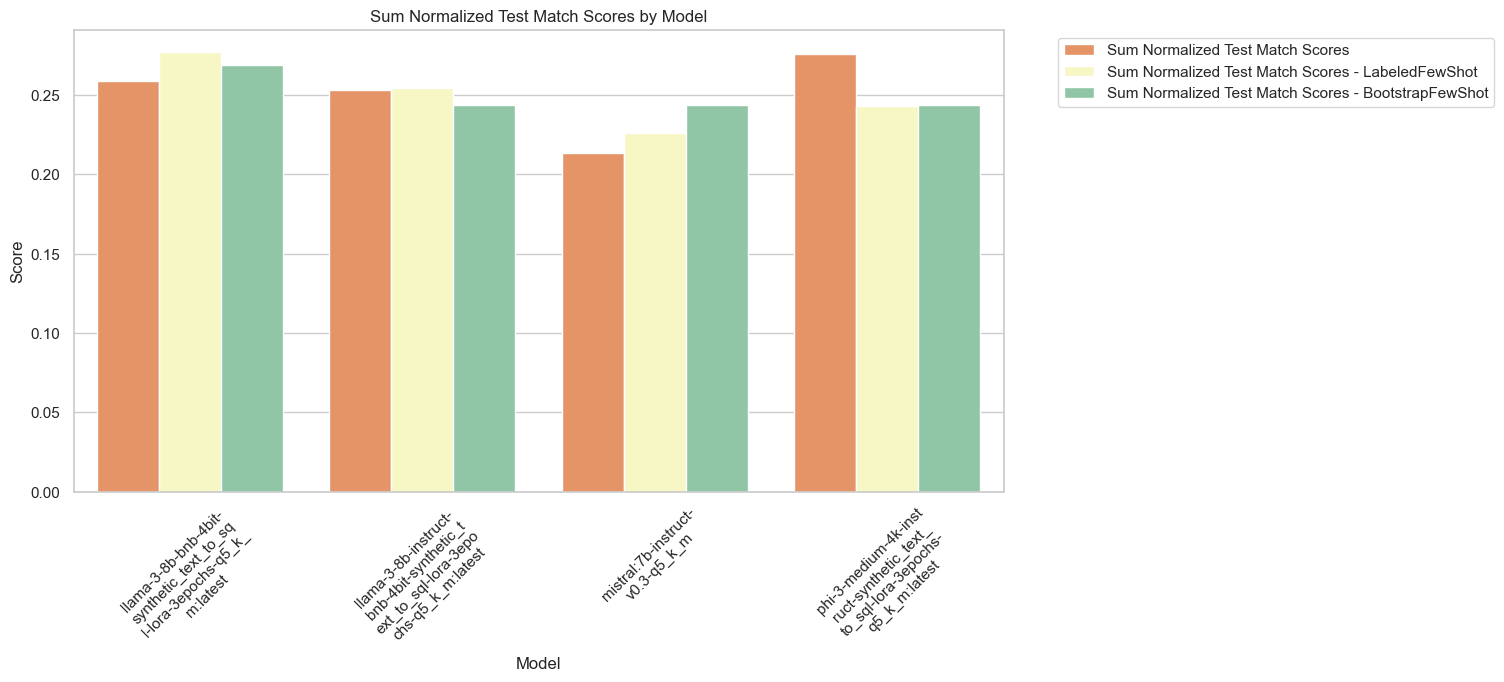

In [182]:
# Calculate the sum of each score type
sum_validation_scores = df[['Validation Match Scores', 'Validation Match Scores - LabeledFewShot', 'Validation Match Scores - BootstrapFewShot']].sum(axis=0)
sum_test_scores = df[['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Sum Normalized Validation Match Scores'] = df['Validation Match Scores'] / sum_validation_scores['Validation Match Scores']
df['Sum Normalized Validation Match Scores - LabeledFewShot'] = df['Validation Match Scores - LabeledFewShot'] / sum_validation_scores['Validation Match Scores - LabeledFewShot']
df['Sum Normalized Validation Match Scores - BootstrapFewShot'] = df['Validation Match Scores - BootstrapFewShot'] / sum_validation_scores['Validation Match Scores - BootstrapFewShot']

df['Sum Normalized Test Match Scores'] = df['Test Match Scores'] / sum_test_scores['Test Match Scores']
df['Sum Normalized Test Match Scores - LabeledFewShot'] = df['Test Match Scores - LabeledFewShot'] / sum_test_scores['Test Match Scores - LabeledFewShot']
df['Sum Normalized Test Match Scores - BootstrapFewShot'] = df['Test Match Scores - BootstrapFewShot'] / sum_test_scores['Test Match Scores - BootstrapFewShot']

# Plot sum normalized validation scores
plot_grouped_scores(df, ['Sum Normalized Validation Match Scores', 'Sum Normalized Validation Match Scores - LabeledFewShot', 'Sum Normalized Validation Match Scores - BootstrapFewShot'], 'Sum Normalized Validation Match Scores by Model')

# Plot sum normalized test scores
plot_grouped_scores(df, ['Sum Normalized Test Match Scores', 'Sum Normalized Test Match Scores - LabeledFewShot', 'Sum Normalized Test Match Scores - BootstrapFewShot'], 'Sum Normalized Test Match Scores by Model')


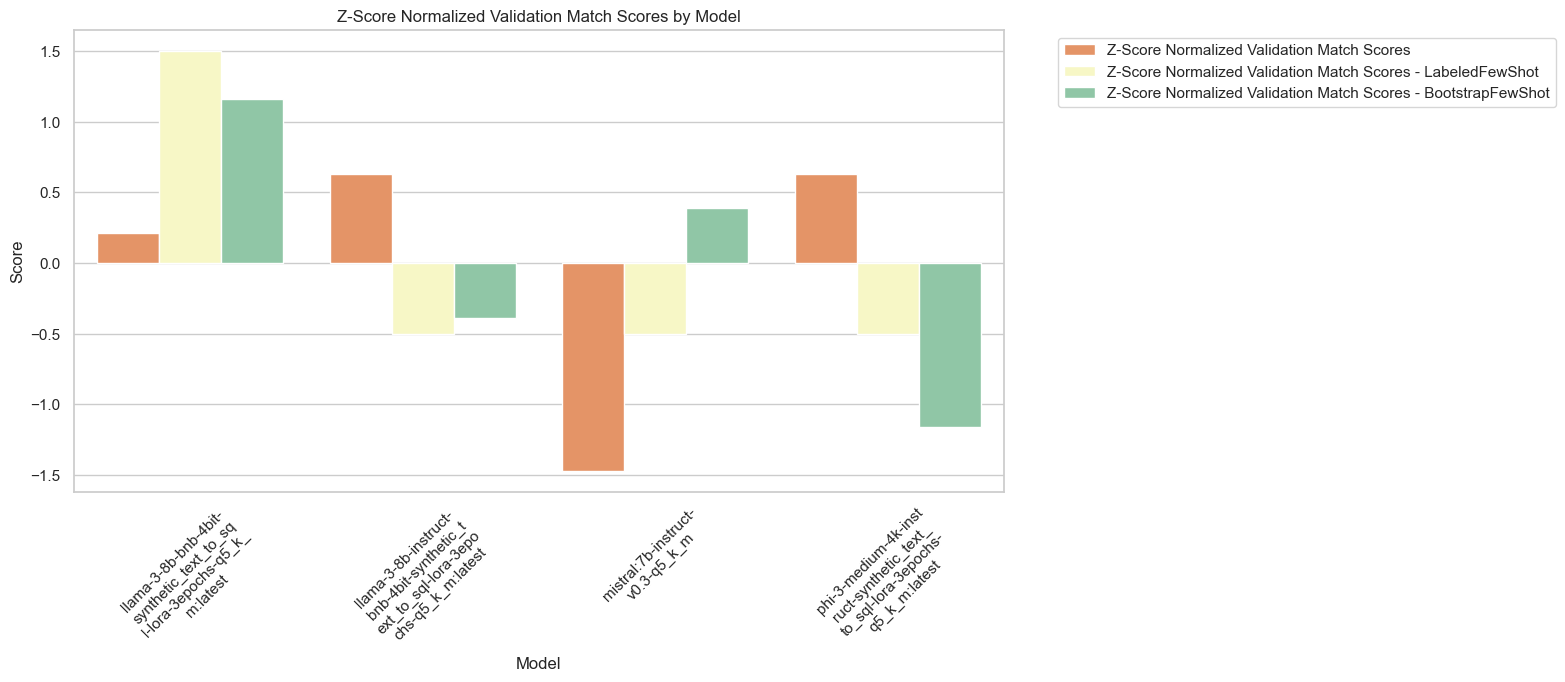

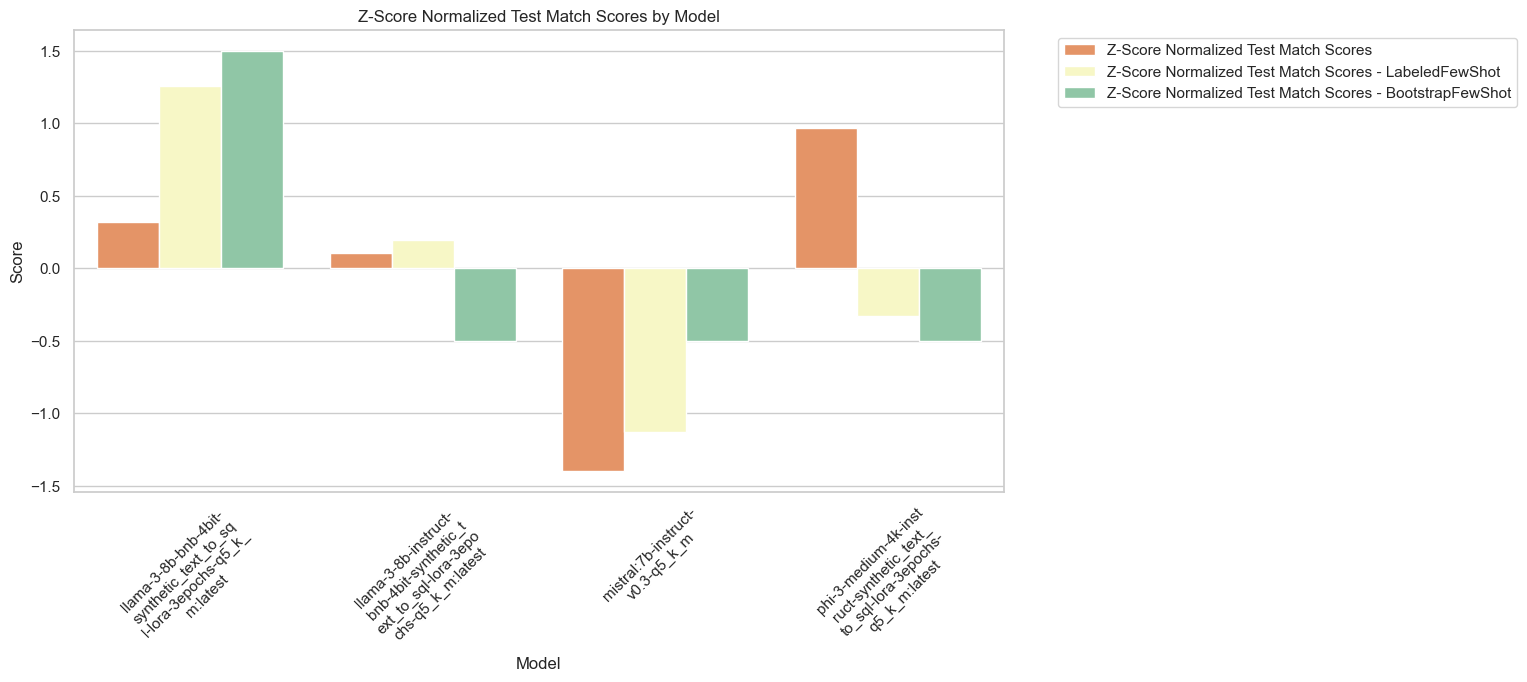

In [183]:
# Calculate the mean and standard deviation for each score type
mean_validation_scores = df[['Validation Match Scores', 'Validation Match Scores - LabeledFewShot', 'Validation Match Scores - BootstrapFewShot']].mean(axis=0)
std_validation_scores = df[['Validation Match Scores', 'Validation Match Scores - LabeledFewShot', 'Validation Match Scores - BootstrapFewShot']].std(axis=0)

mean_test_scores = df[['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot']].mean(axis=0)
std_test_scores = df[['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot']].std(axis=0)

# Normalize the scores using z-score
df['Z-Score Normalized Validation Match Scores'] = (df['Validation Match Scores'] - mean_validation_scores['Validation Match Scores']) / std_validation_scores['Validation Match Scores']
df['Z-Score Normalized Validation Match Scores - LabeledFewShot'] = (df['Validation Match Scores - LabeledFewShot'] - mean_validation_scores['Validation Match Scores - LabeledFewShot']) / std_validation_scores['Validation Match Scores - LabeledFewShot']
df['Z-Score Normalized Validation Match Scores - BootstrapFewShot'] = (df['Validation Match Scores - BootstrapFewShot'] - mean_validation_scores['Validation Match Scores - BootstrapFewShot']) / std_validation_scores['Validation Match Scores - BootstrapFewShot']

df['Z-Score Normalized Test Match Scores'] = (df['Test Match Scores'] - mean_test_scores['Test Match Scores']) / std_test_scores['Test Match Scores']
df['Z-Score Normalized Test Match Scores - LabeledFewShot'] = (df['Test Match Scores - LabeledFewShot'] - mean_test_scores['Test Match Scores - LabeledFewShot']) / std_test_scores['Test Match Scores - LabeledFewShot']
df['Z-Score Normalized Test Match Scores - BootstrapFewShot'] = (df['Test Match Scores - BootstrapFewShot'] - mean_test_scores['Test Match Scores - BootstrapFewShot']) / std_test_scores['Test Match Scores - BootstrapFewShot']

# Plot z-score normalized validation scores
plot_grouped_scores(df, ['Z-Score Normalized Validation Match Scores', 'Z-Score Normalized Validation Match Scores - LabeledFewShot', 'Z-Score Normalized Validation Match Scores - BootstrapFewShot'], 'Z-Score Normalized Validation Match Scores by Model')

# Plot z-score normalized test scores
plot_grouped_scores(df, ['Z-Score Normalized Test Match Scores', 'Z-Score Normalized Test Match Scores - LabeledFewShot', 'Z-Score Normalized Test Match Scores - BootstrapFewShot'], 'Z-Score Normalized Test Match Scores by Model')


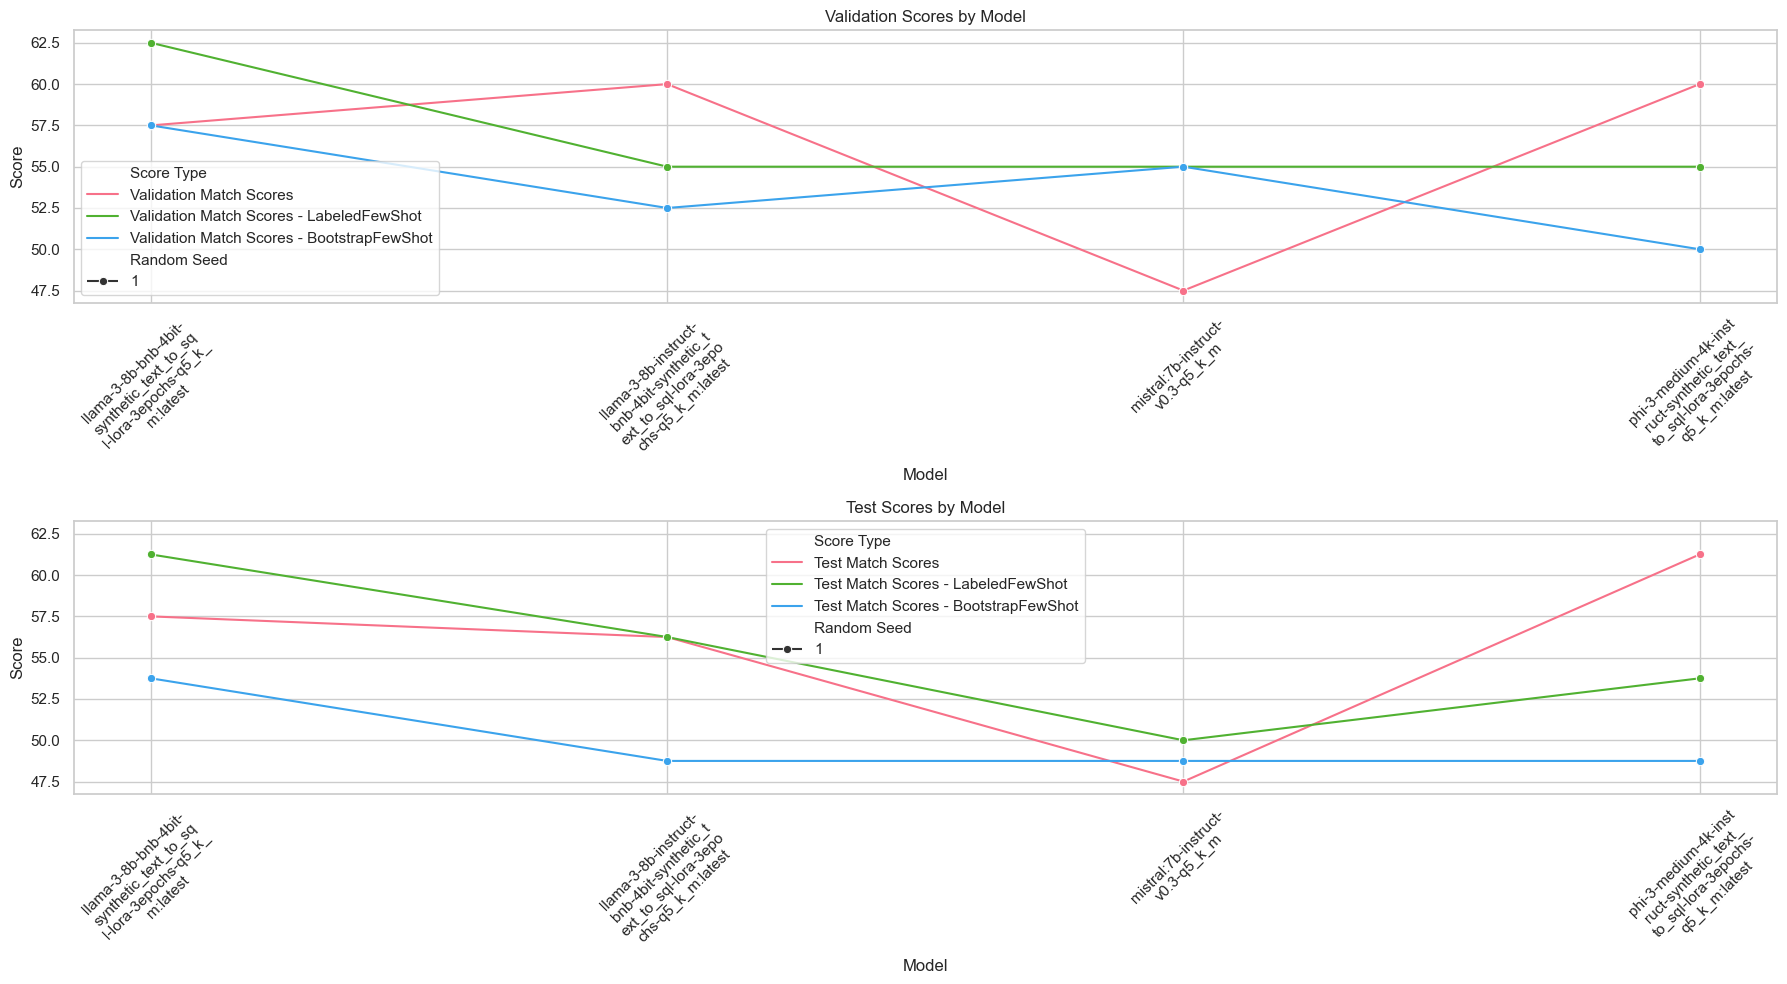

In [184]:
# Melt the DataFrame to long format for each type of test score
validation_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                               value_vars=['Validation Match Scores', 'Validation Match Scores - LabeledFewShot', 'Validation Match Scores - BootstrapFewShot'], 
                               var_name='Score Type', 
                               value_name='Score')

test_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                         value_vars=['Test Match Scores', 'Test Match Scores - LabeledFewShot', 'Test Match Scores - BootstrapFewShot'], 
                         var_name='Score Type', 
                         value_name='Score')

# Define a color palette
palette = sns.color_palette("husl", len(validation_scores_df['Score Type'].unique()))

# Define a dashes dictionary for the random seeds
unique_seeds = validation_scores_df['Random Seed'].unique()
dashes_dict = {seed: ((i+1)*2, 1*i) for i, seed in enumerate(unique_seeds)}

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharey=True)

# Plot validation scores
sns.lineplot(data=validation_scores_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=dashes_dict, palette=palette, ax=axs[0])
axs[0].set_title('Validation Scores by Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot test scores
sns.lineplot(data=test_scores_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=dashes_dict, palette=palette, ax=axs[1])
axs[1].set_title('Test Scores by Model')
axs[1].set_xlabel('Model')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
